# Working with image data
- Reading and manipulating image colorspaces
- Flattening images

In [1]:
import os
import cv2
import numpy as np

## Reading Images: 

In [2]:
## Reading images
im=cv2.imread("./data/kitty.jpg")

In [3]:
type(im)

numpy.ndarray

In [4]:
im

array([[[192, 187, 172],
        [192, 187, 172],
        [191, 186, 171],
        ...,
        [127, 140, 138],
        [130, 141, 139],
        [129, 140, 138]],

       [[192, 187, 172],
        [192, 187, 172],
        [192, 187, 172],
        ...,
        [127, 140, 138],
        [130, 141, 139],
        [131, 142, 140]],

       [[191, 186, 171],
        [192, 187, 172],
        [193, 187, 174],
        ...,
        [129, 140, 138],
        [127, 138, 136],
        [129, 140, 138]],

       ...,

       [[ 76,  87,  95],
        [ 74,  85,  93],
        [ 72,  83,  91],
        ...,
        [ 71,  74,  88],
        [ 72,  75,  89],
        [ 70,  73,  87]],

       [[ 72,  85,  93],
        [ 72,  85,  93],
        [ 73,  84,  92],
        ...,
        [ 73,  76,  90],
        [ 72,  73,  87],
        [ 68,  69,  83]],

       [[ 68,  81,  89],
        [ 71,  84,  92],
        [ 73,  84,  92],
        ...,
        [ 77,  80,  94],
        [ 75,  76,  90],
        [ 70,  71,  85]]

In [5]:
im.shape

(1836, 3264, 3)

In [6]:
## OpenCV always treats images in BGR color space, so 
im[:,:,0] # is the part corresponding to blue space

array([[192, 192, 191, ..., 127, 130, 129],
       [192, 192, 192, ..., 127, 130, 131],
       [191, 192, 193, ..., 129, 127, 129],
       ...,
       [ 76,  74,  72, ...,  71,  72,  70],
       [ 72,  72,  73, ...,  73,  72,  68],
       [ 68,  71,  73, ...,  77,  75,  70]], dtype=uint8)

In [7]:
im[:,:,1] # is the part corresponding to green space

array([[187, 187, 186, ..., 140, 141, 140],
       [187, 187, 187, ..., 140, 141, 142],
       [186, 187, 187, ..., 140, 138, 140],
       ...,
       [ 87,  85,  83, ...,  74,  75,  73],
       [ 85,  85,  84, ...,  76,  73,  69],
       [ 81,  84,  84, ...,  80,  76,  71]], dtype=uint8)

In [8]:
im[:,:,2] # is the part corresponding to red space

array([[172, 172, 171, ..., 138, 139, 138],
       [172, 172, 172, ..., 138, 139, 140],
       [171, 172, 174, ..., 138, 136, 138],
       ...,
       [ 95,  93,  91, ...,  88,  89,  87],
       [ 93,  93,  92, ...,  90,  87,  83],
       [ 89,  92,  92, ...,  94,  90,  85]], dtype=uint8)

In [9]:
## We can convert an image from BGR space to RGB space or Grayscale space
im_rgb=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)

In [10]:
im_grayscale=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

In [11]:
print(im_rgb.shape)

(1836, 3264, 3)


In [12]:
print(im_grayscale.shape) #Notice there is only a single channel

(1836, 3264)


In [13]:
## We can also visualize these numpy arrays using matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

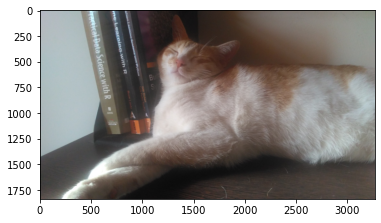

In [14]:
# We can use the imshow() function to display images
plt.imshow(im_rgb)

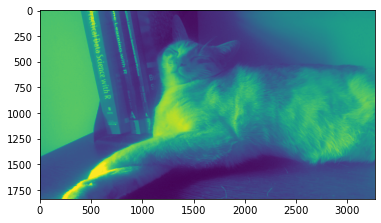

In [15]:
plt.imshow(im_grayscale)

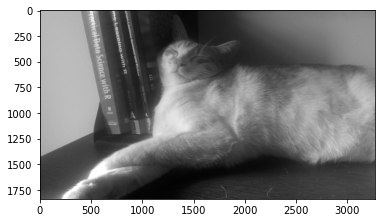

In [16]:
## imshow() has to be explicitly told, that we are in a grayspace color space by using cmap parameter
plt.imshow(im_grayscale,cmap="gray")

In [17]:
## We can resize images, photos captured by modern devices have very large resolution, doing machine 
# learning on these images can be computationally expensive, we can resize an image to reduce the 
# number of data points we have to work with
im_resized=cv2.resize(im_grayscale,(500,500),cv2.INTER_LINEAR)

In [18]:
im_resized

array([[183, 184, 184, ..., 136, 142, 138],
       [183, 184, 186, ..., 141, 142, 135],
       [182, 185, 185, ..., 138, 137, 134],
       ...,
       [ 87,  86,  85, ...,  76,  78,  77],
       [ 84,  90,  87, ...,  75,  76,  78],
       [ 83,  82,  84, ...,  77,  77,  79]], dtype=uint8)

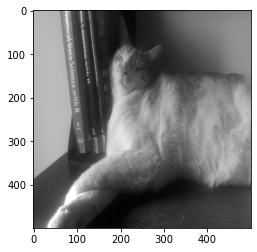

In [19]:
plt.imshow(im_resized,cmap="gray")

In [20]:
im_resized.shape

(500, 500)

In [21]:
## Every image will be an array and can be indexed like one
im_resized[0:400:,]

array([[183, 184, 184, ..., 136, 142, 138],
       [183, 184, 186, ..., 141, 142, 135],
       [182, 185, 185, ..., 138, 137, 134],
       ...,
       [ 70,  78,  74, ..., 117,  98,  83],
       [ 78,  73,  74, ..., 108,  87,  76],
       [ 75,  74,  71, ...,  93,  82,  73]], dtype=uint8)

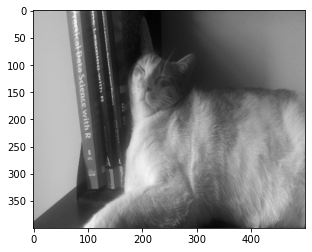

In [22]:
plt.imshow(im_resized[0:400:,],cmap="gray")

In [23]:
im_resized[:,0:200]

array([[183, 184, 184, ...,  32,  23,  27],
       [183, 184, 186, ...,  27,  23,  27],
       [182, 185, 185, ...,  27,  25,  26],
       ...,
       [ 87,  86,  85, ...,  15,  16,  17],
       [ 84,  90,  87, ...,  16,  15,  16],
       [ 83,  82,  84, ...,  13,  14,  18]], dtype=uint8)

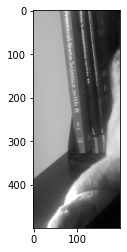

In [24]:
plt.imshow(im_resized[:,0:200],cmap="gray")

# Flattening Images

In [25]:
### Flattening images
five=cv2.imread("./data/five.jpg")

In [26]:
five.shape

(225, 225, 3)

In [27]:
seven=cv2.imread("./data/seven.png")
two=cv2.imread("./data/two.jpg")

In [28]:
print(seven.shape)
print(two.shape)

(225, 225, 3)
(225, 224, 3)


In [29]:
## We will need to convert them to grayscale
f_g=cv2.cvtColor(five,cv2.COLOR_BGR2GRAY)
s_g=cv2.cvtColor(seven,cv2.COLOR_BGR2GRAY)
t_g=cv2.cvtColor(two,cv2.COLOR_BGR2GRAY)

In [30]:
print(f_g.shape)
print(s_g.shape)
print(t_g.shape)

(225, 225)
(225, 225)
(225, 224)


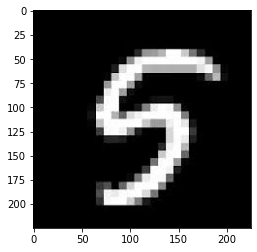

In [31]:
# Let's plot them
plt.imshow(f_g,cmap="gray")

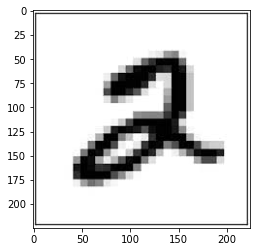

In [32]:
plt.imshow(t_g,cmap="gray")

In [33]:
## We may want to resize them to same size
f_g_r=cv2.resize(f_g,(100,100),cv2.INTER_LINEAR)
s_g_r=cv2.resize(s_g,(100,100),cv2.INTER_LINEAR)
t_g_r=cv2.resize(t_g,(100,100),cv2.INTER_LINEAR)

In [34]:
print(f_g_r.shape)
print(s_g_r.shape)
print(t_g_r.shape)

(100, 100)
(100, 100)
(100, 100)


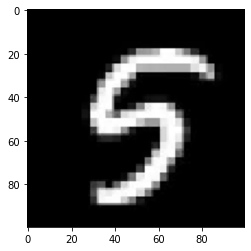

In [35]:
plt.imshow(f_g_r,cmap="gray")

In [36]:
f_flat=f_g_r.reshape(100*100)

In [37]:
s_flat=s_g_r.reshape(100*100)
t_flat=t_g_r.reshape(100*100)

In [38]:
f_flat

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [39]:
f_flat.shape

(10000,)

In [40]:
## Lets stack them together
flattened_images=np.stack([f_flat,s_flat,t_flat],axis=0)

In [41]:
flattened_images.shape

(3, 10000)

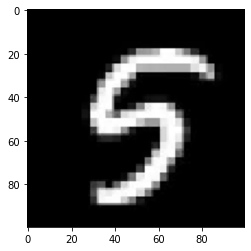

In [42]:
## What if I want to plot this flattened image, I can use reshape method!!!
plt.imshow(flattened_images[0,:].reshape((100,100)),cmap="gray")

In [43]:
## We can write out the flattened images as a csv file as well
import pandas as pd
flattened_dataframe=pd.DataFrame(flattened_images)

In [44]:
flattened_dataframe.to_csv("./data/flattened_images.csv",index=False)

### Class Excercise:

Use the data place [here](https://drive.google.com/file/d/1U8gTouMoFGzB2ssvHyB_e3KNoaNd0yyO/view?usp=sharing) and flatten it into a train.csv file, produce flattened features as well as labels for each of the images

In [51]:
path = "/Users/gunnvantsaini/Downloads/DevanagariHandwrittenCharacterDataset/Train"
letters = os.listdir(path)
letters = [l for l in letters if l!=".DS_Store"]
dims_x = []
dims_y = []
cls = []
for letter in letters:
    cur_path = os.path.join(path,letter)
    imgs = os.listdir(cur_path)
    for img in imgs:
        img_path = os.path.join(path,cur_path,img)
        im=cv2.imread(img_path)
        im_grayscale=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
        dims_x.append(im_grayscale.shape[0])
        dims_y.append(im_grayscale.shape[1])
        cls.append(letter)

In [53]:
summary = pd.DataFrame({'dims_x':dims_x,'dims_y':dims_y,'cls':cls})

In [54]:
summary.describe()

,dims_x,dims_y
count,78200.0,78200.0
mean,32.0,32.0
std,0.0,0.0
min,32.0,32.0
25%,32.0,32.0
50%,32.0,32.0
75%,32.0,32.0
max,32.0,32.0


In [56]:
path = "/Users/gunnvantsaini/Downloads/DevanagariHandwrittenCharacterDataset/Train"
letters = os.listdir(path)
letters = [l for l in letters if l!=".DS_Store"]
features = []
cls = []
for letter in letters:
    cur_path = os.path.join(path,letter)
    imgs = os.listdir(cur_path)
    for img in imgs:
        img_path = os.path.join(path,cur_path,img)
        im=cv2.imread(img_path)
        im_grayscale=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
        features.append(im_grayscale.reshape(32*32))
        cls.append(letter)

In [60]:
features = np.stack(features)

In [61]:
flattened = pd.DataFrame(features)

In [63]:
flattened['label']=cls

In [64]:
flattened.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_29_waw
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_29_waw
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_29_waw
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_29_waw
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_29_waw
